1. Data loading and cleaning
2. Regression
    1. Linear Regression
    2. Ridge and Lasso Regression
    3. Polinomial Regression
    4. Decision Tree Regression

In [3]:
# Downloading the data through Kaggle API

"""import kaggle
kaggle.api.authenticate()

kaggle.api.dataset_download_files('sujithmandala/second-hand-car-price-prediction', path='.', unzip=True)"""

"import kaggle\nkaggle.api.authenticate()\n\nkaggle.api.dataset_download_files('sujithmandala/second-hand-car-price-prediction', path='.', unzip=True)"

In [4]:
# Load the data and display the first few rows
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

data = pd.read_csv('data/cars/cars.csv')
print(data.head())

   Car_ID    Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
0       1   Toyota  Corolla  2018              50000    Petrol       Manual   
1       2    Honda    Civic  2019              40000    Petrol    Automatic   
2       3     Ford  Mustang  2017              20000    Petrol    Automatic   
3       4   Maruti    Swift  2020              30000    Diesel       Manual   
4       5  Hyundai   Sonata  2016              60000    Diesel    Automatic   

  Owner_Type  Mileage  Engine  Power  Seats    Price  
0      First       15    1498    108      5   800000  
1     Second       17    1597    140      5  1000000  
2      First       10    4951    395      4  2500000  
3      Third       23    1248     74      5   600000  
4     Second       18    1999    194      5   850000  


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
# Extract the unique values of the categorical features 

print(data['Brand'].unique())
print(data['Model'].unique())
print(data['Fuel_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner_Type'].unique())

['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']
['Petrol' 'Diesel']
['Manual' 'Automatic']
['First' 'Second' 'Third']


In [7]:
# Drop the car ID model
data.drop('Car_ID', axis=1, inplace=True)

# Convert Fuel_Type, Transmission and Owner_Type to int type
data['Fuel_Type'] = data['Fuel_Type'].map({'Diesel': 0, 'Petrol': 1})
data['Transmission'] = data['Transmission'].map({'Manual': 0, 'Automatic': 1})
data['Owner_Type'] = data['Owner_Type'].map({'First': 1, 'Second': 2, 'Third': 3})

# Convert the other categorical features to one-hot encoding
data = pd.get_dummies(data, columns=['Brand', 'Model'])
dummy_columns = [col for col in data.columns if col.startswith('Brand_') or col.startswith('Model_')]
data[dummy_columns] = data[dummy_columns].astype(int)

# Display the first few rows of the modified data
print(data.head())


   Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0  2018              50000          1             0           1       15   
1  2019              40000          1             1           2       17   
2  2017              20000          1             1           1       10   
3  2020              30000          0             0           3       23   
4  2016              60000          0             1           2       18   

   Engine  Power  Seats    Price  ...  Model_Vento  Model_Venue  Model_Verna  \
0    1498    108      5   800000  ...            0            0            0   
1    1597    140      5  1000000  ...            0            0            0   
2    4951    395      4  2500000  ...            0            0            0   
3    1248     74      5   600000  ...            0            0            0   
4    1999    194      5   850000  ...            0            0            0   

   Model_Vitara  Model_WR-V  Model_X1  Model_X3  Model_X5  Mod

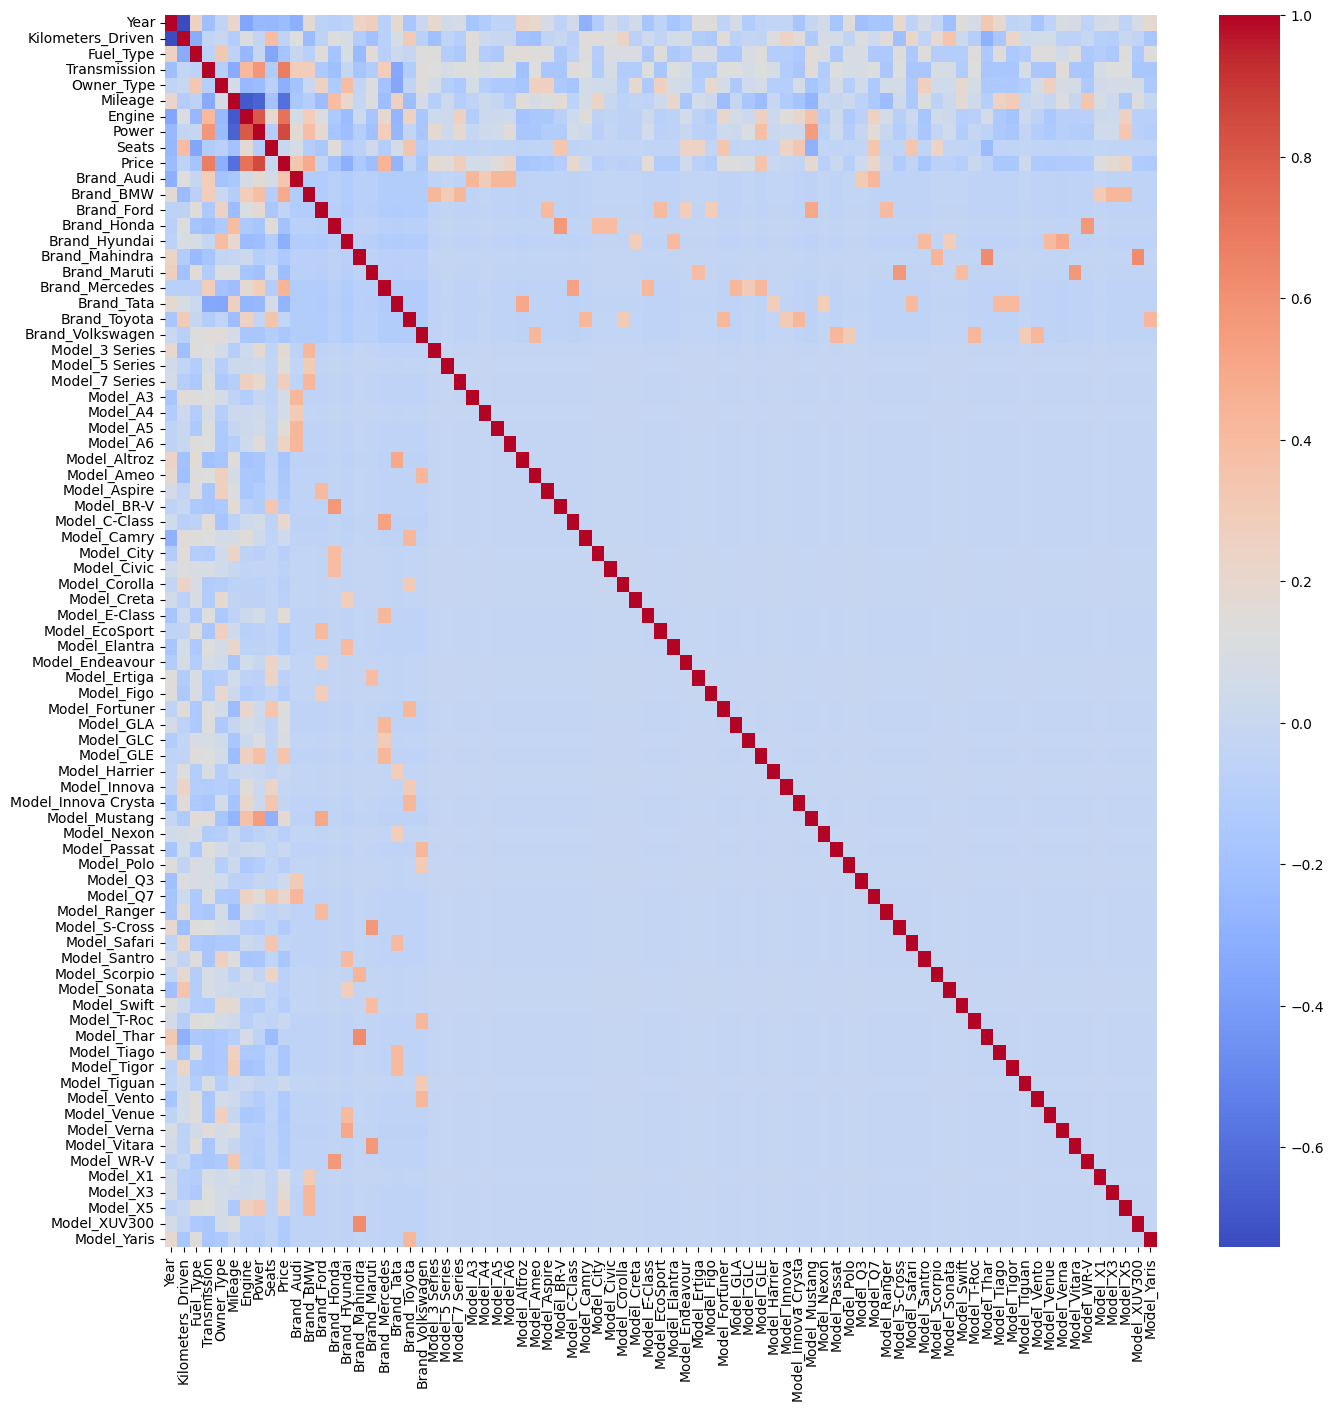

In [8]:
# Plot correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 16))
sns.heatmap(data.corr(), cmap='coolwarm', xticklabels=data.columns, yticklabels=data.columns) #, fmt='.2f'
plt.show()

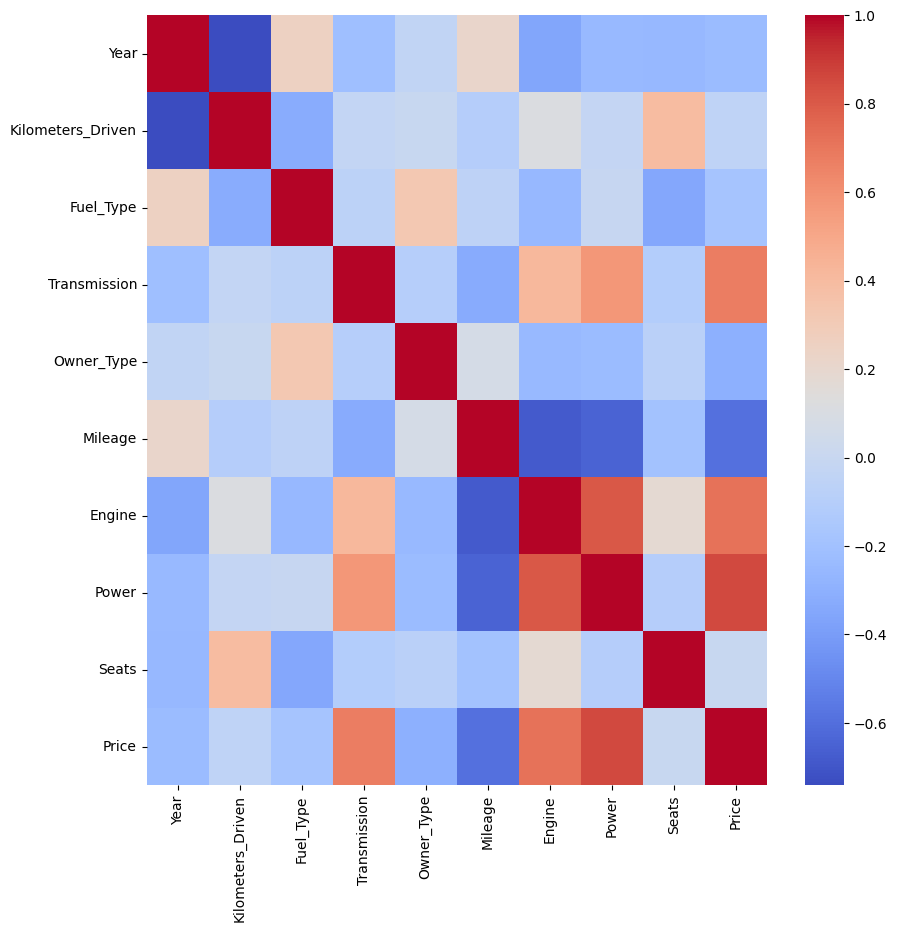

In [9]:
# Create a subset of the data with only the features and the target

sub_data = data[['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

plt.figure(figsize = (10, 10))
sns.heatmap(sub_data.corr(), cmap='coolwarm', xticklabels=sub_data.columns, yticklabels=sub_data.columns) #, fmt='.2f'
plt.show()

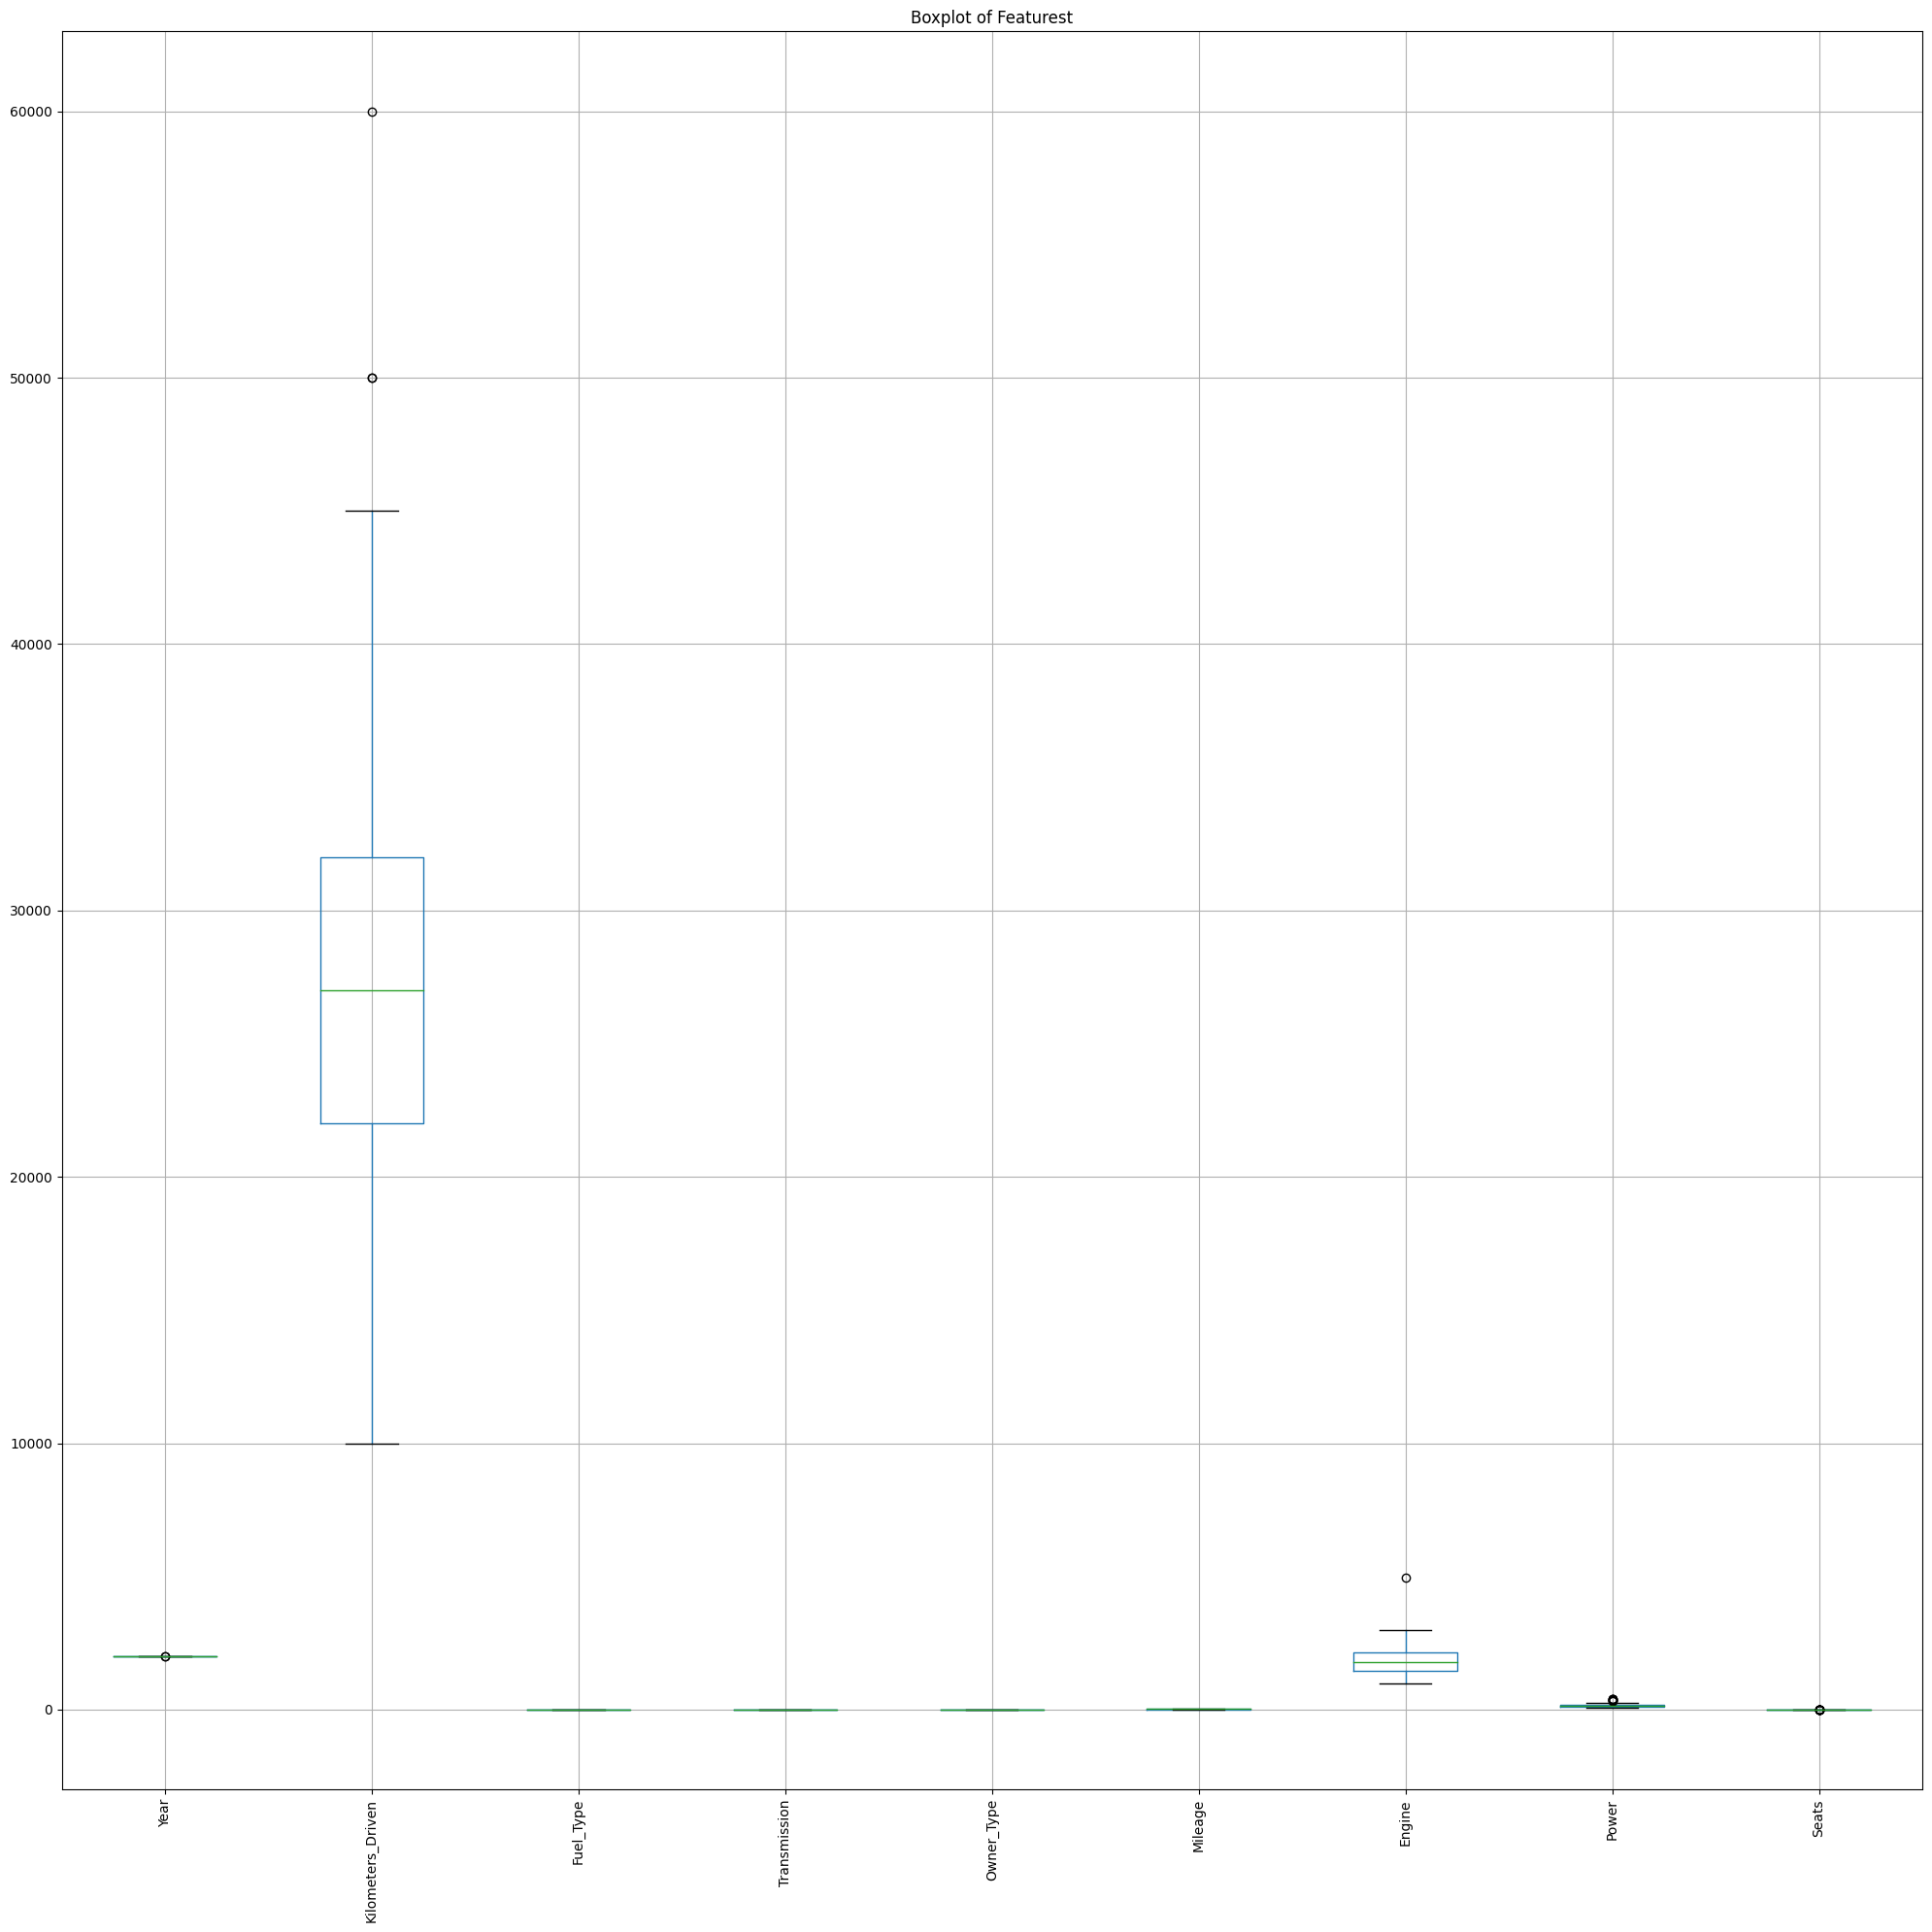

In [10]:
# Plot the distribution of the variables to detect outliers

plt.figure(figsize=(20, 20))
sub_data.loc[:, ~sub_data.columns.isin(['Price'])].boxplot()  
plt.title(f'Boxplot of Featurest')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


# Standardise also the target variable
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1, 1)).flatten()


In [12]:
import numpy as np

def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Linear Regression

In [13]:
# Fit a linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = model.score(X_test, y_test)

print(f'Mean Squared Error: {mse:.2f}, R^2: {r2:.3f}')


Mean Squared Error: 99784591024.34, R^2: 0.894


In [14]:
model_scaled = LinearRegression()
model_scaled.fit(X_train, y_train_scaled)

y_pred_scaled = model_scaled.predict(X_test)

mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = model_scaled.score(X_test, y_test_scaled)

print(f'Mean Squared Error: {mse:.2f}, R^2: {r2_scaled:.3f}')

Mean Squared Error: 0.10, R^2: 0.905


In [15]:
# Destandardise the predicted data

upscaled_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

print(f'the inverse scaled data are: {upscaled_pred}')

cleaned_pred = np.array(upscaled_pred[:,0]).round(3)
print(cleaned_pred)

the inverse scaled data are: [[2489914.67282925]
 [2368035.09589973]
 [3153598.56541318]
 [2232817.78673397]
 [3313122.64887309]
 [2232817.78673397]
 [1721676.28876345]
 [ 838286.57098432]
 [ 663888.55071252]
 [2732588.47918448]
 [ 907108.13351377]
 [ 663888.55071252]
 [1467118.60717339]
 [1519384.71080906]
 [1058291.42831279]
 [ 595306.11987972]
 [ 954300.71632445]
 [1620236.61350291]
 [ 655895.03994832]
 [2111723.63369507]]
[2489914.673 2368035.096 3153598.565 2232817.787 3313122.649 2232817.787
 1721676.289  838286.571  663888.551 2732588.479  907108.134  663888.551
 1467118.607 1519384.711 1058291.428  595306.12   954300.716 1620236.614
  655895.04  2111723.634]


In [15]:
import numpy as np

comparison = pd.DataFrame({'True': y_test.values, 'Predicted not scaled': np.round(y_pred, 3), 'Predicted scaled' : cleaned_pred})
print(comparison)

       True  Predicted not scaled  Predicted scaled
0   3200000           2399665.771       2489914.673
1   2400000           2274313.952       2368035.096
2   2500000           3082257.439       3153598.565
3   2600000           2135244.420       2232817.787
4   3500000           3246326.224       3313122.649
5   2600000           2135244.420       2232817.787
6   1800000           1609540.947       1721676.289
7    500000            700984.227        838286.571
8    650000            521617.760        663888.551
9   2900000           2649253.143       2732588.479
10   700000            771766.456        907108.134
11   650000            521617.760        663888.551
12  1500000           1347731.139       1467118.607
13  1600000           1401486.258       1519384.711
14   650000            927256.831       1058291.428
15   600000            451081.475        595306.120
16   850000            820303.514        954300.716
17  1200000           1505211.344       1620236.614
18   700000 

In [16]:
import numpy as np

def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

linreg_mape = MAPE(y_test, y_pred)

print(f'Mean Absolute Percentage Error: {linreg_mape:.2f}%')


Mean Absolute Percentage Error: 18.00%


In [17]:
linreg_mape_scaled = MAPE(y_test_scaled, y_pred_scaled)

print(f'Mean Absolute Percentage Error: {linreg_mape_scaled:.2f}%')

Mean Absolute Percentage Error: 32.56%


In [18]:
lin_reg_coeff = model.coef_
lin_reg_inter = model.intercept_

print(f'The coefficients of the linear regression are: {lin_reg_coeff}')
print(f'The intercepts of the linear regression are: {lin_reg_inter}')

The coefficients of the linear regression are: [ 5.66585469e+04 -1.00191541e+05 -2.33162922e+05  1.48366129e+05
 -1.65607365e+04 -1.26307791e+05  1.36412540e+05  2.30021552e+05
 -3.00939763e+04  1.04486234e+05  1.19085253e+05 -2.26422421e+04
 -4.41948037e+04 -7.44962190e+04 -8.07689506e+04 -5.95527059e+04
  1.21498840e+05 -5.04282244e+04 -1.69684804e+04 -2.67658921e+04
  4.66155773e+04  5.24765818e+04  4.23000732e+04  5.84388031e+04
  6.25277607e-12 -3.63797881e-12  1.04634586e+05 -3.31482598e+04
 -6.68663667e+04 -1.06921445e+04 -2.71499297e+04  3.86502436e+04
  6.83256819e+04 -8.93456737e+03 -1.37468116e+04  3.53355797e+03
 -1.82964720e+03  3.56219010e+04 -1.95655996e+04 -7.67511724e+04
  5.64070167e+03  1.00693760e+04 -4.27441580e+04  5.14022152e+04
 -1.97564944e+04  1.90469543e+04  1.59697400e+05 -8.76188011e-12
 -3.60132344e+04 -5.90523541e+04  2.54588271e+04  2.55006985e+03
 -3.55191723e+04  9.09494702e-13  3.16915828e+04  2.08220760e+04
 -2.16245952e+04 -7.45455213e+04 -1.8184295

In [19]:
col = X.columns

comparison = pd.DataFrame({'Variables': col, 'Coefficients': np.round(lin_reg_coeff, 3)})
                           
print(comparison)


            Variables  Coefficients
0                Year     56658.547
1   Kilometers_Driven   -100191.541
2           Fuel_Type   -233162.922
3        Transmission    148366.129
4          Owner_Type    -16560.736
..                ...           ...
73           Model_X1     24428.900
74           Model_X3     43003.875
75           Model_X5     66567.016
76       Model_XUV300    -30485.908
77        Model_Yaris    -73506.461

[78 rows x 2 columns]


In [20]:
print_min_coeff = comparison.loc[comparison['Coefficients'].abs().sort_values(ascending=True).index]
print(print_min_coeff)

       Variables  Coefficients
53    Model_Polo         0.000
25      Model_A5        -0.000
68   Model_Vento         0.000
67  Model_Tiguan         0.000
24      Model_A4         0.000
..           ...           ...
6         Engine    136412.540
3   Transmission    148366.129
46     Model_GLE    159697.400
7          Power    230021.552
2      Fuel_Type   -233162.922

[78 rows x 2 columns]


(array([1., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        3., 2., 4., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
        1.]),
 array([-582257.43861717, -542754.81955663, -503252.20049608,
        -463749.58143554, -424246.96237499, -384744.34331445,
        -345241.72425391, -305739.10519336, -266236.48613282,
        -226733.86707227, -187231.24801173, -147728.62895119,
        -108226.00989064,  -68723.3908301 ,  -29220.77176955,
          10281.84729099,   49784.46635153,   89287.08541208,
         128789.70447262,  168292.32353317,  207794.94259371,
         247297.56165426,  286800.1807148 ,  326302.79977534,
         365805.41883589,  405308.03789643,  444810.65695698,
         484313.27601752,  523815.89507806,  563318.51413861,
         602821.13319915,  642323.7522597 ,  681826.37132024,
         721328.99038078,  760831.60944133,  800334.22850187]),
 <BarContainer object of 35 artists>)

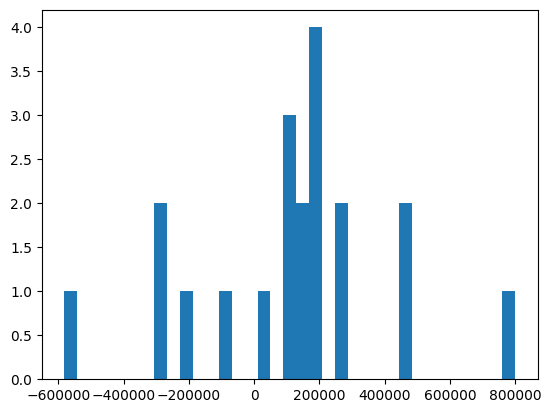

In [20]:
from matplotlib.pylab import plt
import seaborn as sns
# Plot the distribution of the residuals

residuals = y_test - y_pred

#sns.distplot(residuals, hist= False)
plt.hist(residuals, bins = 35)


In [21]:
# Create a subset without: Engine, KIlometers_Driven to exclude some auto-correlation

X_2 = X.loc[:, ~X.columns.isin(['Engine', 'Kilometers_Driven', 'Transmission', 'Seats'])]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=0)

X_train_2 = StandardScaler().fit_transform(X_train_2)
X_test_2 = StandardScaler().fit_transform(X_test_2)

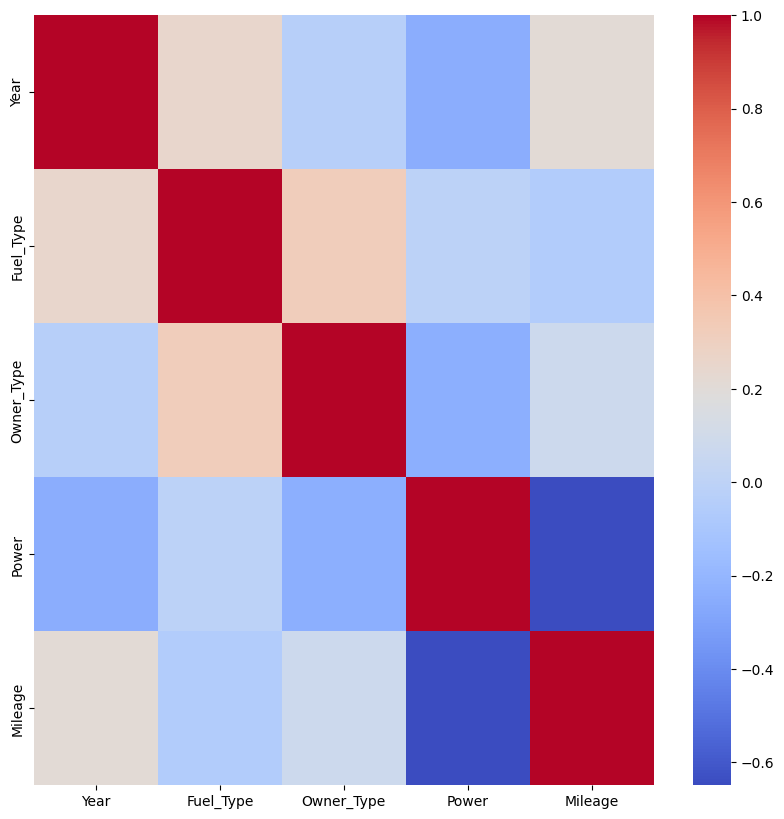

In [ ]:
plt.figure(figsize = (10, 10))
X_2_sub = X_2[['Year', 'Fuel_Type', 'Owner_Type', 'Power', 'Mileage']]
sns.heatmap(X_2_sub.corr(), cmap='coolwarm', xticklabels=X_2_sub.columns, yticklabels=X_2_sub.columns) #, fmt='.2f'
plt.show()

In [23]:
# Fit a linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_2, y_train_2)

# Evaluate the model

y_pred_2 = model.predict(X_test_2)
mse = mean_squared_error(y_test_2, y_pred_2)
r2 = model.score(X_test_2, y_test_2)

print(f'Mean Squared Error: {mse:.2f}, R^2: {r2:.2f}')


Mean Squared Error: 81751515386.69, R^2: 0.91


In [24]:
linreg_mape = MAPE(y_test_2, y_pred_2)

print(f'Mean Absolute Percentage Error: {linreg_mape:.2f}%')

Mean Absolute Percentage Error: 14.91%


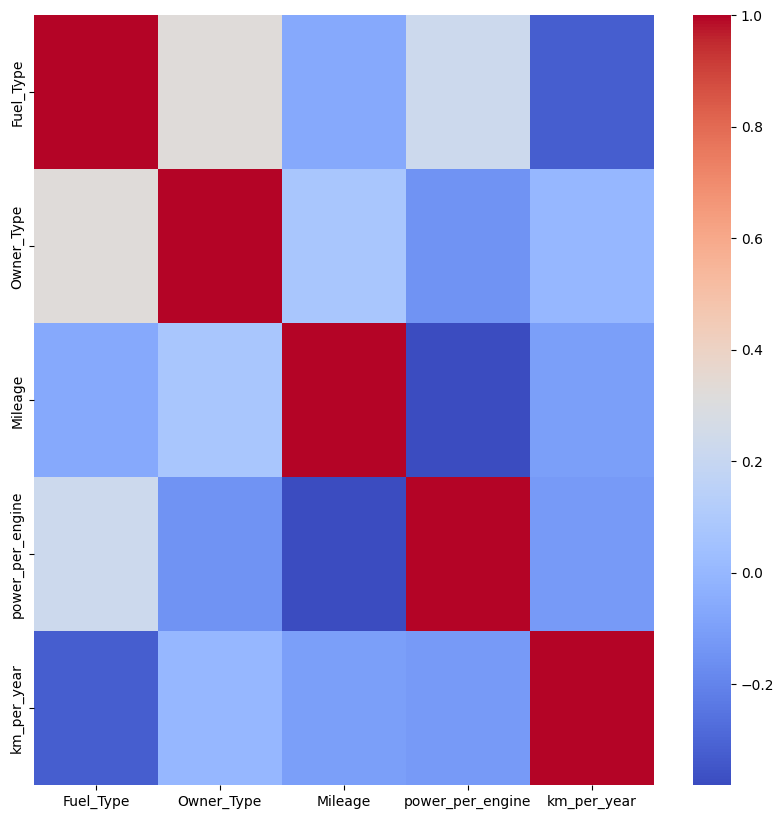

In [29]:
# Insead of eliminating the features, we can create new features by combining the existing ones

X_3 = X.copy()

# Create feature km_per_year
X_3['km_per_year'] = data['Kilometers_Driven'] / data['Year']

# Create feature power_per_engine
X_3['power_per_engine'] = data['Power'] / data['Engine']

X_3 = X_3[['Fuel_Type', 'Owner_Type', 'Mileage', 'power_per_engine', 'km_per_year']]

plt.figure(figsize = (10, 10))
sns.heatmap(X_3.corr(), cmap='coolwarm', xticklabels=X_3.columns, yticklabels=X_3.columns) #, fmt='.2f'
plt.show()

In [30]:
# Insead of eliminating the features, we can create new features by combining the existing ones

X_3 = X.copy()

# Create feature km_per_year
X_3['km_per_year'] = data['Kilometers_Driven'] / data['Year']

# Create feature power_per_engine
X_3['power_per_engine'] = data['Power'] / data['Engine']

X_3 = X_3[['Fuel_Type', 'Owner_Type', 'Mileage', 'power_per_engine', 'km_per_year']]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.2, random_state=0)

X_train_3 = StandardScaler().fit_transform(X_train_3)
X_test_3 = StandardScaler().fit_transform(X_test_3)

# Fit a linear regression model
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train_3)

# Evaluate the model

y_pred_3 = model_3.predict(X_test_3)
mse = mean_squared_error(y_test_3, y_pred_3)
r2 = model_3.score(X_test_3, y_test_3)

print(f'Mean Squared Error: {mse:.2f}, R^2: {r2:.2f}, MAPE: {MAPE(y_test_3, y_pred_3):.2f}%')


Mean Squared Error: 146187710079.49, R^2: 0.85, MAPE: 26.14%


### Ridge and Lasso Regression

In [31]:
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge Regression with Cross-Validation (L2 regularization)
ridge_reg = RidgeCV(alphas=[0.1, 1.0, 10.0, 1000], cv=5, )
ridge_reg.fit(X_train, y_train)

print(f'Ridge Regression Alpha: {ridge_reg.alpha_}')


# Lasso Regression with Cross-Validation (L1 regularization)
lasso_reg = LassoCV(alphas=[0.5, 1.0, 4, 100, 1000], cv=5)
lasso_reg.fit(X_train, y_train)

print(f'Lasso Regression Alpha: {lasso_reg.alpha_}')

# Evaluate the models
y_pred_ridge = ridge_reg.predict(X_test)

ridge_r2 = ridge_reg.score(X_test, y_test)
print(f'Ridge Regression MAPE : {MAPE(y_test, y_pred_ridge):.2f}%, R^2: {ridge_r2:.2f} ,  MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}')


y_pred_lasso = lasso_reg.predict(X_test)
lasso_r2 = lasso_reg.score(X_test, y_test)
print(f'Lasso Regression MAPE: {MAPE(y_test, y_pred_lasso):.2f}%, R^2: {lasso_r2:.2f} MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}')

Ridge Regression Alpha: 1.0
Lasso Regression Alpha: 1000.0
Ridge Regression MAPE : 16.92%, R^2: 0.88 ,  MSE: 109230731137.21
Lasso Regression MAPE: 12.39%, R^2: 0.93 MSE: 67956318992.46


In [32]:
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge Regression with Cross-Validation (L2 regularization)
ridge_reg = RidgeCV(alphas=[0.1, 1.0, 10.0, 1000], cv=5, )
ridge_reg.fit(X_train_3, y_train_3)

print(f'Ridge Regression Alpha: {ridge_reg.alpha_}')

# Lasso Regression with Cross-Validation (L1 regularization)
lasso_reg = LassoCV(alphas=[0.5, 1.0, 4, 100, 1000], cv=5)
lasso_reg.fit(X_train_3, y_train_3)

print(f'Lasso Regression Alpha: {lasso_reg.alpha_}')

# Evaluate the models
y_pred_ridge = ridge_reg.predict(X_test_3)

ridge_r2 = ridge_reg.score(X_test_3, y_test_3)
print(f'Ridge Regression MAPE : {MAPE(y_test_3, y_pred_ridge):.2f}%, R^2: {ridge_r2:.2f} ,  MSE: {mean_squared_error(y_test_3, y_pred_ridge):.2f}')


y_pred_lasso = lasso_reg.predict(X_test_3)
lasso_r2 = lasso_reg.score(X_test_3, y_test_3)
print(f'Lasso Regression MAPE: {MAPE(y_test_3, y_pred_lasso):.2f}%, R^2: {lasso_r2:.2f} MSE: {mean_squared_error(y_test_3, y_pred_lasso):.2f}')

Ridge Regression Alpha: 1.0
Lasso Regression Alpha: 0.5
Ridge Regression MAPE : 25.90%, R^2: 0.85 ,  MSE: 146108687851.71
Lasso Regression MAPE: 26.14%, R^2: 0.85 MSE: 146187673548.80


In [33]:
import numpy as np

comparison = pd.DataFrame({'True': y_test.values, 'Predicted': np.round(y_pred_lasso, 3),
                           'Difference': np.round(y_test.values - y_pred_lasso, 3), 'Percentage diff.': np.round((y_test.values - y_pred_lasso) / y_test.values * 100, 2)})
print(comparison)

       True    Predicted  Difference  Percentage diff.
0   3200000  2962742.714  237257.286              7.41
1   2400000  1881889.851  518110.149             21.59
2   2500000  2300096.542  199903.458              8.00
3   2600000  2388006.063  211993.937              8.15
4   3500000  2524067.070  975932.930             27.88
5   2600000  2388006.063  211993.937              8.15
6   1800000  1407529.111  392470.889             21.80
7    500000   265575.455  234424.545             46.88
8    650000   191713.922  458286.078             70.51
9   2900000  2784516.646  115483.354              3.98
10   700000  1231269.061 -531269.061            -75.90
11   650000   191713.922  458286.078             70.51
12  1500000  1958185.036 -458185.036            -30.55
13  1600000  1748443.886 -148443.886             -9.28
14   650000   858146.063 -208146.063            -32.02
15   600000   510577.529   89422.471             14.90
16   850000   744756.875  105243.125             12.38
17  120000

### Polynomial Regression

In [36]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

lin_mod = LinearRegression()
lin_mod.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
y_pred_poly = lin_mod.predict(X_test_poly)

poly_r2 = lin_mod.score(X_test_poly, y_test)

print(f'Polynomial Regression MAPE: {MAPE(y_test, y_pred_poly):.2f}%, R^2: {poly_r2:.2f} MSE: {mean_squared_error(y_test, y_pred_poly):.2e}')

Polynomial Regression MAPE: 54.94%, R^2: 0.50 MSE: 4.73e+11


### Support Vector Regression

In [37]:
# Support Vector Regression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.01)
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)
svr_r2 = svr.score(X_test, y_test)

print(f'Support Vector Regression MAPE: {MAPE(y_test, y_pred_svr):.2f}%, R^2: {svr_r2:.2f} MSE: {mean_squared_error(y_test, y_pred_svr):.2f}')

# Too small dataset for SVR


Support Vector Regression MAPE: 61.99%, R^2: -0.18 MSE: 1116968244091.48


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'epsilon': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)

# Use best estimator
svr_best = grid_search.best_estimator_
y_pred_svr = svr_best.predict(X_test)

svr_best_r2 = svr_best.score(X_test, y_test)

print(f'Support Vector Regression MAPE: {MAPE(y_test, y_pred_svr):.2f}%, R^2: {svr_best_r2:.2f} MSE: {mean_squared_error(y_test, y_pred_svr):.2f}')


Best Params: {'C': 100, 'epsilon': 1, 'gamma': 'scale'}
Support Vector Regression MAPE: 60.20%, R^2: -0.13 MSE: 1068285755730.07


In [40]:
import numpy as np

comparison = pd.DataFrame({'True': y_test, 'Predicted': np.round(y_pred_svr, 3),
                           'Difference': np.round(y_test - y_pred_svr, 3), 'Percentage diff.': np.round((y_test - y_pred_svr) / y_test * 100, 2)})
print(comparison)

       True    Predicted   Difference  Percentage diff.
26  3200000  1279783.102  1920216.898             60.01
86  2400000  1274662.131  1125337.869             46.89
2   2500000  1315081.135  1184918.865             47.40
55  2600000  1270973.523  1329026.477             51.12
75  3500000  1295314.239  2204685.761             62.99
93  2600000  1270973.523  1329026.477             51.12
16  1800000  1265203.166   534796.834             29.71
73   500000  1230915.796  -730915.796           -146.18
54   650000  1245315.631  -595315.631            -91.59
95  2900000  1278158.155  1621841.845             55.93
53   700000  1226162.756  -526162.756            -75.17
92   650000  1245315.631  -595315.631            -91.59
78  1500000  1270308.507   229691.493             15.31
13  1600000  1257287.708   342712.292             21.42
7    650000  1241175.052  -591175.052            -90.95
30   600000  1222380.876  -622380.876           -103.73
22   850000  1220138.522  -370138.522           

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_r2 = rf.score(X_test, y_test)

print(f'Random Forest Regression MAPE: {MAPE(y_test, y_pred_rf):.2f}%, R^2: {rf_r2:.2f} MSE: {mean_squared_error(y_test, y_pred_rf):.2e}')

Random Forest Regression MAPE: 12.95%, R^2: 0.87 MSE: 1.25e+11


In [57]:
import numpy as np

comparison = pd.DataFrame({'True': y_test, 'Predicted': np.round(y_pred_rf, 3),
                           'Difference': np.round(y_test - y_pred_rf, 3), 'Percentage diff.': np.round((y_test - y_pred_rf) / y_test * 100, 2)})
print(comparison)

       True  Predicted  Difference  Percentage diff.
26  3200000  3005000.0    195000.0              6.09
86  2400000  2187000.0    213000.0              8.88
2   2500000  3456000.0   -956000.0            -38.24
55  2600000  2879500.0   -279500.0            -10.75
75  3500000  2817000.0    683000.0             19.51
93  2600000  2879500.0   -279500.0            -10.75
16  1800000  1029500.0    770500.0             42.81
73   500000   515000.0    -15000.0             -3.00
54   650000   739000.0    -89000.0            -13.69
95  2900000  2835000.0     65000.0              2.24
53   700000   722000.0    -22000.0             -3.14
92   650000   739000.0    -89000.0            -13.69
78  1500000  1466500.0     33500.0              2.23
13  1600000  1843500.0   -243500.0            -15.22
7    650000   509500.0    140500.0             21.62
30   600000   588000.0     12000.0              2.00
22   850000   799000.0     51000.0              6.00
24  1200000   887000.0    313000.0            

In [44]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [4, 6, 10],
    'min_samples_leaf': [3, 5, 8]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train.ravel())

# Get the best parameters
best_params = grid_search.best_params_

print(f'best random forest regressor: {best_params}')

# Fit the model with the best parameters

rf_best = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'], random_state=0)

rf_best.fit(X_train, y_train)

y_pred_rf_best = rf_best.predict(X_test)
rf_best_r2 = rf_best.score(X_test, y_test)

print(f'Random Forest Regression MAPE: {MAPE(y_test, y_pred_rf_best):.2f}%, R^2: {rf_best_r2:.2f} MSE: {mean_squared_error(y_test, y_pred_rf_best):.2e}')
print(f'Best Parameters: {best_params}')

best random forest regressor: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
Random Forest Regression MAPE: 13.00%, R^2: 0.87 MSE: 1.19e+11
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [45]:
import numpy as np

comparison = pd.DataFrame({'True': y_test, 'Predicted': np.round(y_pred_rf_best, 3),
                           'Difference': np.round(y_test - y_pred_rf_best, 3), 'Percentage diff.': np.round((y_test - y_pred_rf_best) / y_test * 100, 2)})
print(comparison)

       True    Predicted  Difference  Percentage diff.
26  3200000  2888578.824  311421.176              9.73
86  2400000  2072353.571  327646.429             13.65
2   2500000  3436965.476 -936965.476            -37.48
55  2600000  2795460.631 -195460.631             -7.52
75  3500000  2867023.629  632976.371             18.09
93  2600000  2795460.631 -195460.631             -7.52
16  1800000  1023834.704  776165.296             43.12
73   500000   517259.740  -17259.740             -3.45
54   650000   772644.061 -122644.061            -18.87
95  2900000  2757392.136  142607.864              4.92
53   700000   742924.026  -42924.026             -6.13
92   650000   772644.061 -122644.061            -18.87
78  1500000  1486741.545   13258.455              0.88
13  1600000  1768200.855 -168200.855            -10.51
7    650000   506615.206  143384.794             22.06
30   600000   581460.444   18539.556              3.09
22   850000   825505.646   24494.354              2.88
24  120000

In [60]:

X_3 = X.copy()

# Create feature km_per_year
X_3['km_per_year'] = data['Kilometers_Driven'] / data['Year']

# Create feature power_per_engine
X_3['power_per_engine'] = data['Power'] / data['Engine']

X_3 = X_3[['Fuel_Type', 'Owner_Type', 'Mileage', 'power_per_engine', 'km_per_year']]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.2, random_state=0)

X_train_3 = StandardScaler().fit_transform(X_train_3)
X_test_3 = StandardScaler().fit_transform(X_test_3)


rf_3 = RandomForestRegressor(n_estimators=100, random_state=0)
rf_3.fit(X_train_3, y_train_3)

y_pred_rf_3 = rf_3.predict(X_test_3)
rf_r2 = rf_3.score(X_test_3, y_test_3)

print(f'Random Forest Regression MAPE: {MAPE(y_test, y_pred_rf_3):.2f}%, R^2: {rf_r2:.2f} MSE: {mean_squared_error(y_test, y_pred_rf_3):.2e}')

Random Forest Regression MAPE: 30.11%, R^2: 0.78 MSE: 2.11e+11


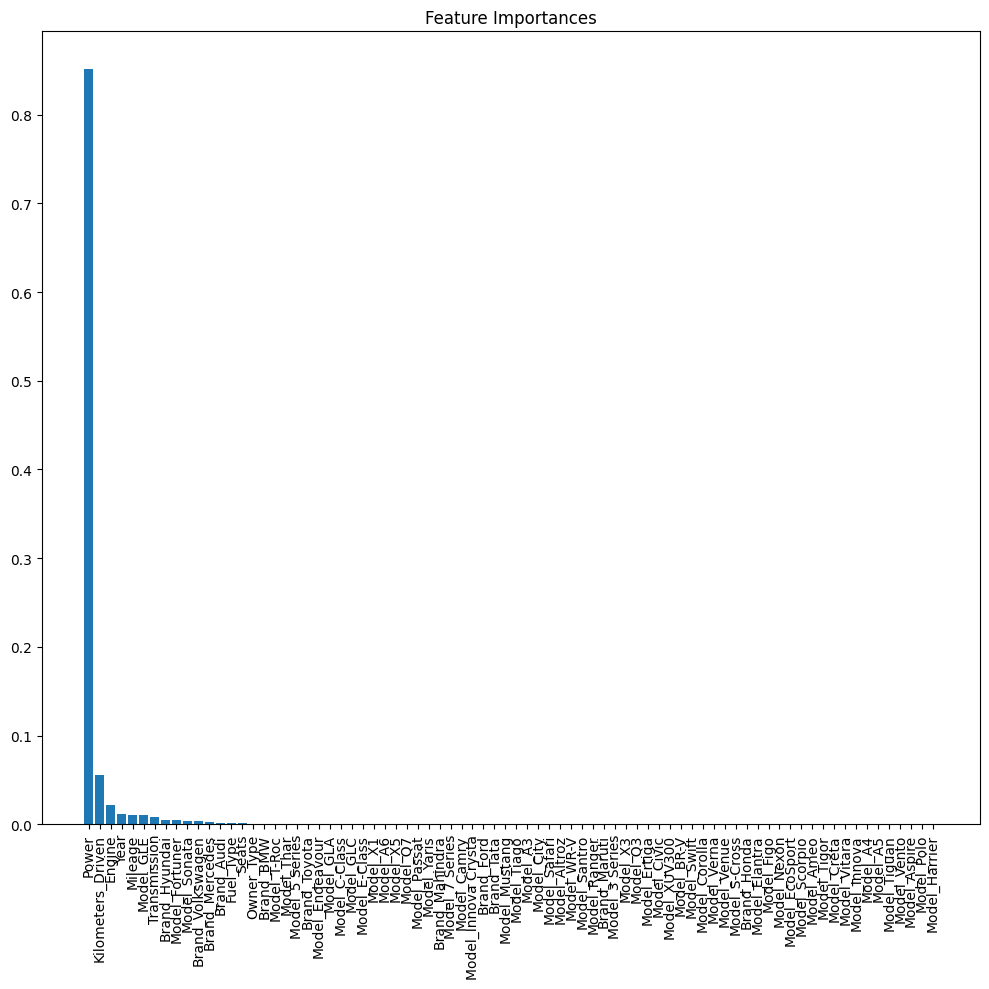

In [59]:
# Plot feature importance

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)

plt.tight_layout()
plt.show()

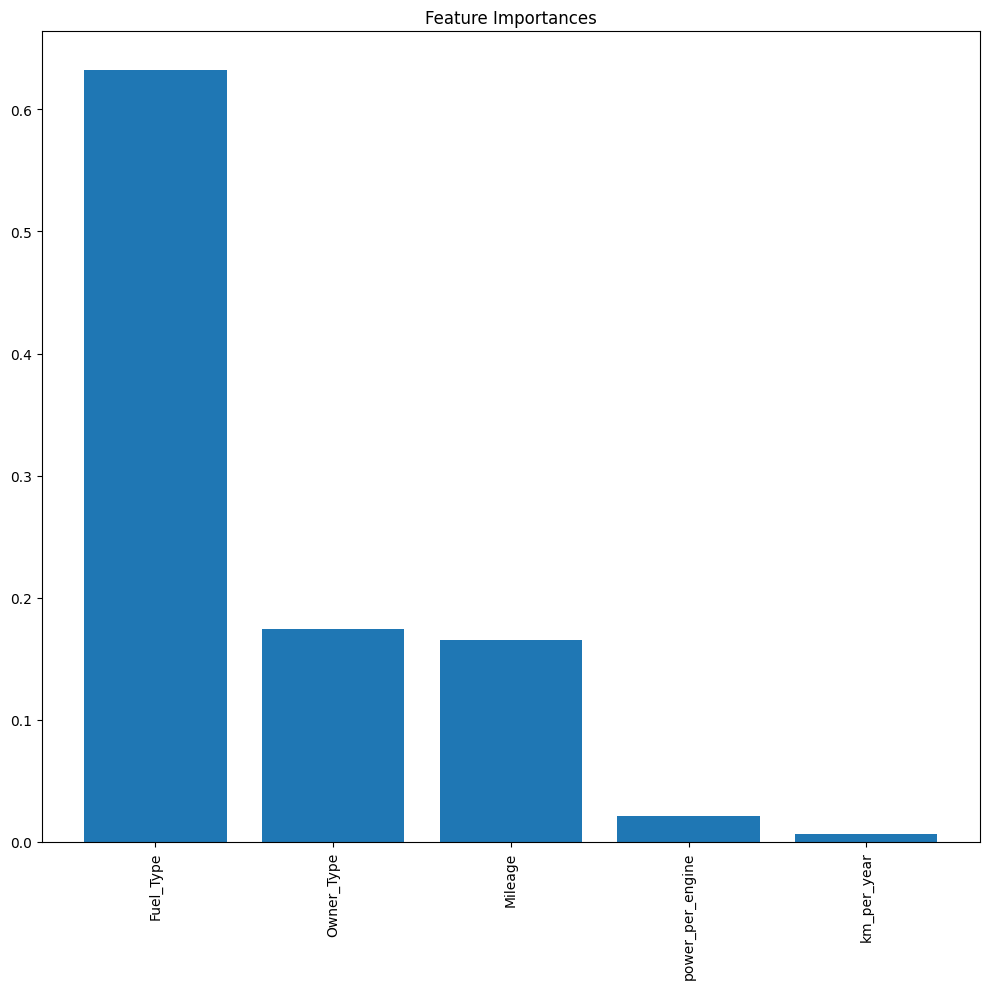

In [61]:
# Plot feature importance

importances = rf_3.feature_importances_
indices = np.argsort(importances)[::-1]

columns = ['Fuel_Type', 'Owner_Type', 'Mileage', 'power_per_engine', 'km_per_year']

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.bar(range(X_train_3.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_3.shape[1]), [col for col in columns], rotation=90)

plt.tight_layout()
plt.show()